<a href="https://colab.research.google.com/github/ACoolA-008/Data_Science_Projects/blob/main/Deep%20Learning%20Projects/C6.%20LSTM/Sentiment_Analysis_of_Movie_Reviews_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from keras.datasets import imdb

training_set, testing_set = imdb.load_data(index_from = 3)
X_train, y_train = training_set
X_test, y_test = testing_set

In [12]:
# Keras has encoded the words into numbers thus the result is a list of numbers
print(X_train[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [13]:
# Convert the numbers into words
word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key, value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value:key for key,value in word_to_id.items()}

In [14]:
print(' '.join(id_to_word[id] for id in X_train[159]))

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [15]:
# The target of the sentence is negative 0
print(y_train[159])

0


In [16]:
print(' '.join(id_to_word[id] for id in X_train[6]))

<START> lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a salutory mixture as friends who must pass through jealousies and lies to discover that they love each other good humor is a sustaining virtue which goes a long way towards explaining the accessability of the aged source material which has been toned down a bit in its harsh scepticism i liked the look of the film and how shots were set up and i thought it didn't rely too much on successions of head shots like most other films of the 80s and 90s do very good results


In [17]:
# The target of the sentence is positive 1
print(y_train[6])

1


In [23]:
print("Number of training sampes = {}".format(X_train.shape))
print("Number of testing sampes = {}".format(X_test.shape[0]))

Number of training sampes = (25000,)
Number of testing sampes = 25000


Zero Padding

In [19]:
from keras.preprocessing import sequence

In [20]:
# Perform zero paddings on sequential data and set the max length to 100
X_train_padded = sequence.pad_sequences(X_train, maxlen=100)
X_test_padded = sequence.pad_sequences(X_test, maxlen=100)


In [21]:
print("X_train vector shape= {}".format(X_train_padded.shape))
print("X_test vector shape= {}".format(X_test_padded.shape))

X_train vector shape= (25000, 100)
X_test vector shape= (25000, 100)


Build the Network

In [25]:
# Define a neural network called model
from keras.models import Sequential
model = Sequential()

In [26]:
# Add an Embedding Layer
from keras.layers import Embedding
model.add(Embedding(input_dim=10000, output_dim=128)) # input_dim should be the number of unique words in the dataset; output_dim should be fine-tuned


In [27]:
# Add a LSTM Layer
from keras.layers import LSTM

# By default, LSTM layer adopts 128 recurring units, tanh activation function for the cell state and hidden state, and sigmoid activation function
# to the forget, input, and output gates.
model.add(LSTM(units=128))


In [28]:
# Add a Dense Layer
from keras.layers import Dense
model.add(Dense(units=1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile and Train the Model
# Note the optimizer remains uncertain of choice therefore we try to compare SGD, RMSprop, and adam optimizers
# We use binary_crossentropy for this binary classification problem.

Optimizer = 'SGD'
model.compile(optimizer=Optimizer, loss='binary_crossentropy')

In [31]:
scores = model.fit(x=X_train_padded, y=y_train, batch_size=128, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
196/196 [==============================] - 15s 61ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/10
196/196 [==============================] - 7s 33ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 3/10
196/196 [==============================] - 6s 30ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 4/10
196/196 [==============================] - 5s 27ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 6/10
196/196 [==============================] - 4s 20ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 7/10
196/196 [==============================] - 4s 18ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 8/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 10/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6925 - val_l

In [32]:
# Make a train_model() function

def train_model(Optimizer, X_train, y_train, X_val, y_val):
  model = Sequential()
  model.add(Embedding(input_dim=10000, output_dim=128))
  model.add(LSTM(units=128))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer=Optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=0)
  return scores, model

In [34]:
# Training the 3 models with different optimizers

# Train the LSTM with sgd optimizer
SGD_score, SGD_model = train_model(Optimizer='sgd', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)
# Train the LSTM with RMSprop optimizer
RMSprop_score, RMSprop_model = train_model(Optimizer='RMSprop', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)
# Train the LSTM with adam optimizer
Adam_score, Adam_model = train_model(Optimizer='adam', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

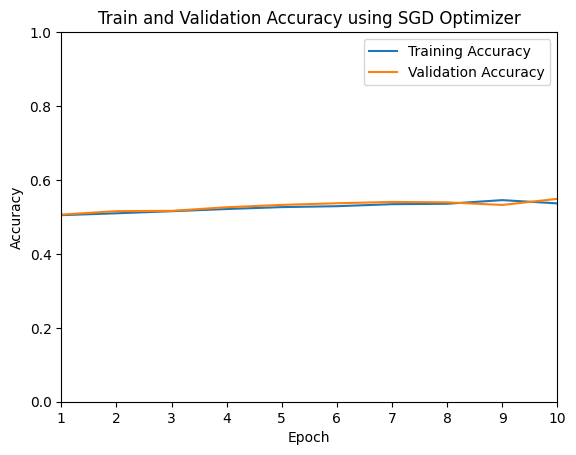

In [40]:
# visualize the training accuracy and validation accuracy among 3 models built with different optimizers

# 2. Visualize the model that is applied with SGD model optimizer


from matplotlib import pyplot as plt

plt.plot(range(1,11), SGD_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy using SGD Optimizer")
plt.legend()
plt.show()

# The graph below displays a stucked training of SGD optimizer at an accuracy of ~50%
# This is no different than using a free toss strategy to guess a prediction thus not a good optimizer for this classification task.

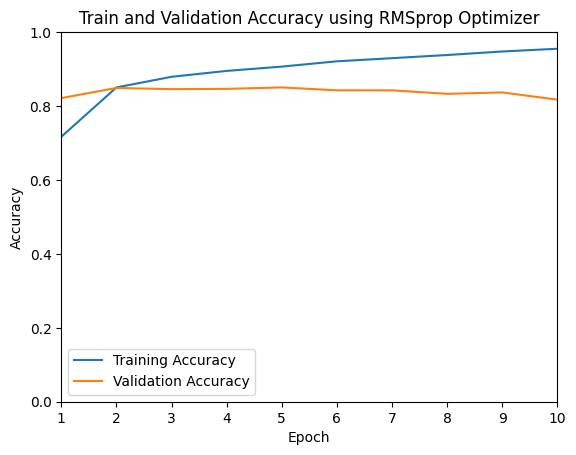

In [42]:
# 2. Visualize the model that is applied with RMSprop optimizer

from matplotlib import pyplot as plt

plt.plot(range(1,11), RMSprop_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy using RMSprop Optimizer")
plt.legend()
plt.show()


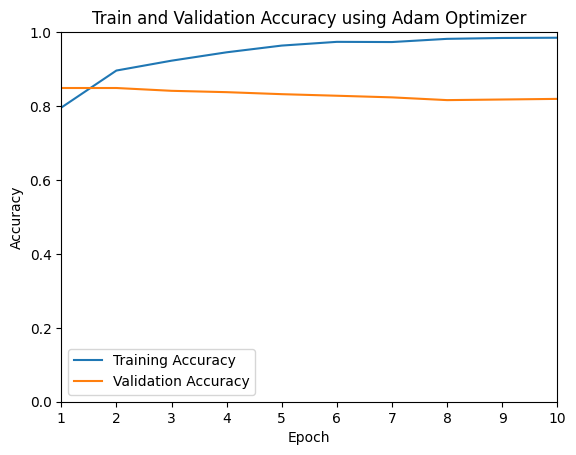

In [43]:
# 3. Visualize the model that is applied with adam optimizer

from matplotlib import pyplot as plt

plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy using Adam Optimizer")
plt.legend()
plt.show()

In [44]:
# Choose RMSprop as the model optimizer for LSTM network
# because the RMSprop optimizer shows a smaller difference between training and validation accuracy
# and adam optimizer has shown overfitting as the training accuracy approached 100%

Evaluate the results with a Confusion Matrix

782/782 [==============================] - 6s 7ms/step


Text(77.24999999999999, 0.5, 'Actual')

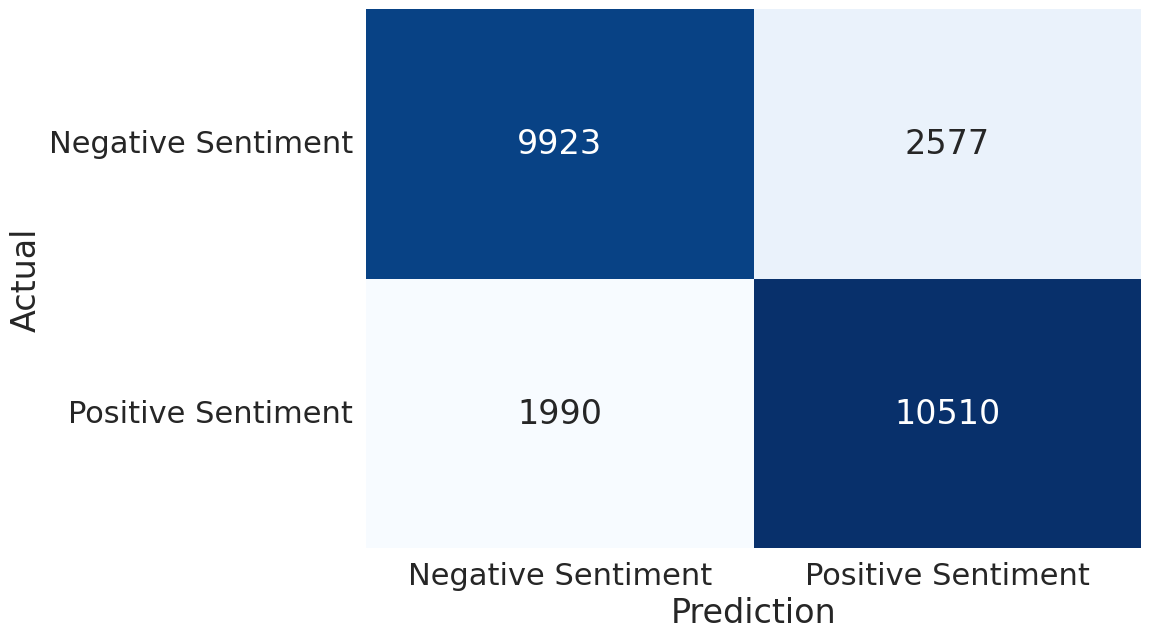

In [49]:
# We expect the confusion matrix to show the numbers of false positive and false negative to as low as possible
# and to show the numbers of true positive and true negative to as many as possible.

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = (RMSprop_model.predict(X_test_padded)>0.5).astype('int32')
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['Negative Sentiment', 'Positive Sentiment'],
                 yticklabels=['Negative Sentiment', 'Positive Sentiment'],
                 cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

1


In [57]:
# Most samples are correctly classified.
# We want to examine the wrongly calssified samples.

false_negative = []
false_positive = []

for i in range(len(y_test_pred)):
  if y_test_pred[i][0] != y_test[i]:
    if y_test[i] == 0:
      false_positive.append(i)
    else:
      false_negative.append(i)